In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv

pd.set_option('display.max_columns', None)

## Load traffic data

In [2]:
nmtraffic = pd.read_csv('../Transportation/tractTraffic_June1/5_output/NMdetail_VMT.csv')
nmtraffic.columns = [column.replace('VMT_','DVMT_') for column in nmtraffic]
nmtraffic.drop(columns = ['Unnamed: 0','VMT'], inplace=True)
nmtraffic.set_index('GEOID',inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '../Transportation/tractTraffic_June1/5_output/NMdetail_VMT.csv'

In [11]:
traffic_breakdown = pd.DataFrame()
for i in nmtraffic.columns:
    traffic_breakdown[str(i)] = nmtraffic[str(i)]
    traffic_breakdown[str(i)+'_pct'] = nmtraffic[str(i)]/nmtraffic.sum(axis=1)
all_dvmt_inds = traffic_breakdown.columns.str.contains('pct') == False
traffic_breakdown['DVMT_all'] = traffic_breakdown.loc[:,all_dvmt_inds].sum(axis=1)
sing_pct_inds = traffic_breakdown.columns.str.contains('SU') & traffic_breakdown.columns.str.contains('pct')
traffic_breakdown['DVMT_SU_pct'] = traffic_breakdown.loc[:,sing_pct_inds].sum(axis=1)
comb_pct_inds = traffic_breakdown.columns.str.contains('CT') & traffic_breakdown.columns.str.contains('pct')
traffic_breakdown['DVMT_CU_pct'] = traffic_breakdown.loc[:,comb_pct_inds].sum(axis=1)
sucu_inds = traffic_breakdown.columns.str.contains('SU')| traffic_breakdown.columns.str.contains('CT') & ~traffic_breakdown.columns.str.contains('pct')
traffic_breakdown['DVMT_SUCU'] = traffic_breakdown.loc[:,sucu_inds].sum(axis=1)
traffic_breakdown['DVMT_SUCU_pct'] = traffic_breakdown['DVMT_SUCU']/traffic_breakdown['DVMT_all'] 

In [12]:
traffic_breakdown

,DVMT_MCc1,DVMT_MCc1_pct,DVMT_PCc2,DVMT_PCc2_pct,DVMT_LTc3,DVMT_LTc3_pct,DVMT_Busc4,DVMT_Busc4_pct,DVMT_SUc5,DVMT_SUc5_pct,DVMT_SUc6,DVMT_SUc6_pct,DVMT_SUc7,DVMT_SUc7_pct,DVMT_CTc8,DVMT_CTc8_pct,DVMT_CTc9,DVMT_CTc9_pct,DVMT_CTc10,DVMT_CTc10_pct,DVMT_CTc11,DVMT_CTc11_pct,DVMT_CTc12,DVMT_CTc12_pct,DVMT_CTc13,DVMT_CTc13_pct,DVMT_all,DVMT_SU_pct,DVMT_CU_pct,DVMT_SUCU,DVMT_SUCU_pct
GEOID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35001000107,170.909937,0.016652,7744.60060,0.754555,2101.636352,0.204762,11.912240,0.001161,84.076235,0.008192,36.686166,0.003574,14.001109,0.001364,34.561204,0.003367,24.639128,0.002401,0.771568,0.000075,10.030129,0.000977,19.949609,0.001944,10.030129,0.000977,10263.804408,0.013130,0.009741,234.771538,0.022874
35001000108,976.735506,0.021168,34546.50899,0.748713,8026.923913,0.173964,145.135894,0.003145,383.911522,0.008320,383.211249,0.008305,161.196931,0.003494,254.684112,0.005520,383.032998,0.008301,92.613798,0.002007,92.779317,0.002011,370.328519,0.008026,324.149584,0.007025,46141.212333,0.020119,0.032890,2445.948268,0.053010
35001000109,893.620107,0.020880,32450.53601,0.758240,7136.436618,0.166750,175.445316,0.004099,351.391863,0.008211,324.527415,0.007583,141.791510,0.003313,235.057869,0.005492,321.281852,0.007507,80.143656,0.001873,86.464267,0.002020,320.699384,0.007493,279.790287,0.006538,42797.186154,0.019107,0.030923,2141.186316,0.050031
35001000110,363.756836,0.019052,14375.53504,0.752943,3424.225498,0.179350,55.454090,0.002905,156.503797,0.008197,125.735436,0.006586,55.218345,0.002892,93.664266,0.004906,122.736598,0.006429,32.532184,0.001704,35.486521,0.001859,135.405730,0.007092,116.207415,0.006087,19092.461756,0.017675,0.028076,873.525642,0.045752
35001000111,737.532746,0.019051,29128.98825,0.752422,7041.940951,0.181898,99.313490,0.002565,305.962821,0.007903,274.336306,0.007086,100.119030,0.002586,175.175060,0.004525,256.131054,0.006616,58.285494,0.001506,67.675763,0.001748,254.234751,0.006567,213.944102,0.005526,38713.639817,0.017576,0.026488,1705.899532,0.044065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35061970902,5269.807320,0.048911,63568.84752,0.590009,23282.279200,0.216092,972.510452,0.009026,4671.218243,0.043355,1059.268800,0.009832,113.541910,0.001054,1460.298892,0.013554,5106.162808,0.047392,462.074490,0.004289,248.528059,0.002307,925.295346,0.008588,602.421373,0.005591,107742.254412,0.054241,0.081721,14648.918402,0.135963
35061971000,821.250785,0.016638,35008.37943,0.709256,11866.747140,0.240416,99.137361,0.002008,583.105335,0.011813,227.041073,0.004600,67.674757,0.001371,247.731532,0.005019,307.292698,0.006226,17.914445,0.000363,19.281913,0.000391,56.843539,0.001152,36.924516,0.000748,49359.324525,0.017784,0.013898,1563.845378,0.031683
35061971100,1144.199910,0.010147,68642.40848,0.608761,34964.628680,0.310087,314.688519,0.002791,1765.502950,0.015658,935.184425,0.008294,81.505669,0.000723,1355.456982,0.012021,3175.765409,0.028165,81.505669,0.000723,4.604296,0.000041,218.462165,0.001937,73.630948,0.000653,112757.544101,0.024674,0.043540,7691.667860,0.068214


In [13]:
cols = nmtraffic.columns
vmt_cols = cols[cols.str.contains('VMT')]
vmt_cols = list(vmt_cols)
print(vmt_cols)

['DVMT_MCc1', 'DVMT_PCc2', 'DVMT_LTc3', 'DVMT_Busc4', 'DVMT_SUc5', 'DVMT_SUc6', 'DVMT_SUc7', 'DVMT_CTc8', 'DVMT_CTc9', 'DVMT_CTc10', 'DVMT_CTc11', 'DVMT_CTc12', 'DVMT_CTc13']


## Load emission factors

In [14]:
emissionfactors = pd.read_csv('Transportation/USDOT_BTS_USAvgMobileSourceEmissionFactors_HCcoNOXpm25_byVehicleType_April2020.csv')

## Convert emission factors for NM vehicle types


In [15]:
#Fraction of VMT driven on diesel fuel. This is the percent of fuel usage that is diesel for each vehicle category according to a report by USDOT, adjusted to account for the difference in fuel economies for diesel and gasoline vehicles. The adjustment is based on the assumption that one diesel gallon is equivalent to 0.8658 gallon gasoline. The miles travelled on one gallon of diesel is therefore 16% higher than miles travelled on one gallon of gasoline.
diesel_fraction = { 'Heavy-duty vehicles': .894*1.013,
                    'Light-duty trucks':  .045*1.013, 
                    'Light-duty vehicles': .06*1.013,
                    'Motorcycles': 0
                  }

mapping = {
    'DVMT_MCc1': 'Motorcycles',
    'DVMT_PCc2': 'Light-duty vehicles',
    'DVMT_LTc3': 'Light-duty trucks',
    'DVMT_Busc4': 'Heavy-duty vehicles',
    'DVMT_SUc5': 'Heavy-duty vehicles',
    'DVMT_SUc6': 'Heavy-duty vehicles',
    'DVMT_SUc7': 'Heavy-duty vehicles',
    'DVMT_CTc8': 'Heavy-duty vehicles',
    'DVMT_CTc9': 'Heavy-duty vehicles',
    'DVMT_CTc10': 'Heavy-duty vehicles',
    'DVMT_CTc11': 'Heavy-duty vehicles',
    'DVMT_CTc12': 'Heavy-duty vehicles',
    'DVMT_CTc13': 'Heavy-duty vehicles'
}

In [17]:
reduced_ef = pd.DataFrame(index=pd.unique(emissionfactors.pollutant), columns=mapping.keys())
for col in reduced_ef.columns:
    vehicle_type = mapping[col]
    vehicle_inds = emissionfactors['Vehicle Type'] == vehicle_type
    for pol in reduced_ef.index:
        pol_inds = emissionfactors['pollutant'] == pol
        pol_vehicles = emissionfactors[vehicle_inds & pol_inds]
        frac_vector = np.zeros(pol_vehicles.shape[0])
        frac_vector[pol_vehicles['Fuel Type'] == 'gasoline'] = 1- diesel_fraction[vehicle_type]
        frac_vector[pol_vehicles['Fuel Type'] == 'diesel'] = diesel_fraction[vehicle_type]
        weighted_average = (pol_vehicles['emissions (grams/mile)']*frac_vector).sum()
        reduced_ef.loc[pol, col] = weighted_average

In [18]:
tract_dailyemissions_g = nmtraffic[vmt_cols].dot(reduced_ef.T)
tract_annualemissions_tons = tract_dailyemissions_g * 365 / 1000000

In [19]:
tract_annualemissions_tons['Total PM2.5'] = tract_annualemissions_tons['Exhaust PM2.5'] + tract_annualemissions_tons['Brakewear PM2.5']+tract_annualemissions_tons['Tirewear PM2.5']
tract_annualemissions_tons.drop(columns=['Brakewear PM2.5','Tirewear PM2.5', 'Exhaust PM2.5'],inplace=True)
tract_annualemissions_tons.columns = [column.replace('Total ','') for column in tract_annualemissions_tons]
tract_annualemissions_tons.columns = [column.replace('Exhaust ','') for column in tract_annualemissions_tons]
tract_annualemissions_tons.columns = [column.replace('Co2','CO2') for column in tract_annualemissions_tons]
pollutants = tract_annualemissions_tons.columns

In [21]:
tract_area = pd.read_csv('Demographic/2018acs5yr_tract.csv')
tract_area.drop(tract_area.columns.difference(['GEOID','tract_area']), 1, inplace=True)
tract_area.set_index('GEOID', inplace=True)

In [22]:
ejscreen = pd.read_csv('Demographic/Census Tract EJ Index New Mexico.csv')
ejscreen.drop(columns = ['STATE_NAME', 'Unnamed: 0'], inplace = True)
ejscreen.set_index('TRACT', inplace = True)

In [23]:
demographics = tract_annualemissions_tons.join(ejscreen).dropna()
demographics = demographics.join(traffic_breakdown).dropna()
demographics = demographics.join(tract_area).dropna()
demographics['pop_density_persqmi'] = demographics['Population']/demographics['tract_area']
demographics['DVMT_all_persqmi'] = demographics['DVMT_all']/demographics['tract_area']
demographics['DVMT_all_perpop'] = demographics['DVMT_all']/demographics['Population']
demographics['DVMT_SUCU_persqmi'] = demographics['DVMT_SUCU']/demographics['tract_area']
for i in pollutants:
    demographics[str(i) + '_pctile'] = demographics[str(i)].rank(pct=True)
    demographics[str(i) + '_percapita'] = demographics[str(i)]/demographics['Population']
    demographics[str(i) + '_percapita_pctile'] = demographics[str(i) + '_percapita'].rank(pct=True)
    demographics[str(i) + '_per_sqmi'] = demographics[str(i)]/demographics['tract_area']
    demographics[str(i) + '_per_sqmi_pctile'] = demographics[str(i) + '_per_sqmi'].rank(pct=True)
    
demographics.to_csv('Demographic/nm_emissions_ejscreen.csv') 

In [25]:
metromicrorural = pd.read_csv('Demographic/NVNMCOtract_MetroMicroRural.csv')
metromicrorural.drop(metromicrorural.columns.difference(['GEOID','NAME_1','MEMI']), 1, inplace=True)
metromicrorural.set_index('GEOID', inplace=True)

In [27]:
metro_demographics = metromicrorural[metromicrorural['MEMI'] == 1]
metro_demographics = metro_demographics.join(demographics).dropna()
metro_demographics.to_csv('Demographic/nm_emissions_ejscreen_metro.csv')

micro_demographics = metromicrorural[metromicrorural['MEMI'] == 2]
micro_demographics = micro_demographics.join(demographics).dropna()
micro_demographics.to_csv('Demographic/nm_emissions_ejscreen_micro.csv')

rural_demographics = metromicrorural[metromicrorural['MEMI'] == 3]
rural_demographics = rural_demographics.join(demographics).dropna()
rural_demographics.to_csv('Demographic/nm_emissions_ejscreen_rural.csv')

In [28]:
import cenpy

In [29]:
acs = cenpy.products.ACS(2018)

In [30]:
nm = acs.from_state('NM')
nm.set_index('GEOID', inplace=True)

In [31]:
nm.set_index(nm.index.astype(int),inplace=True)
combo = nm.join(tract_annualemissions_tons).dropna()
combo[pollutants] = combo[pollutants].astype(np.float)

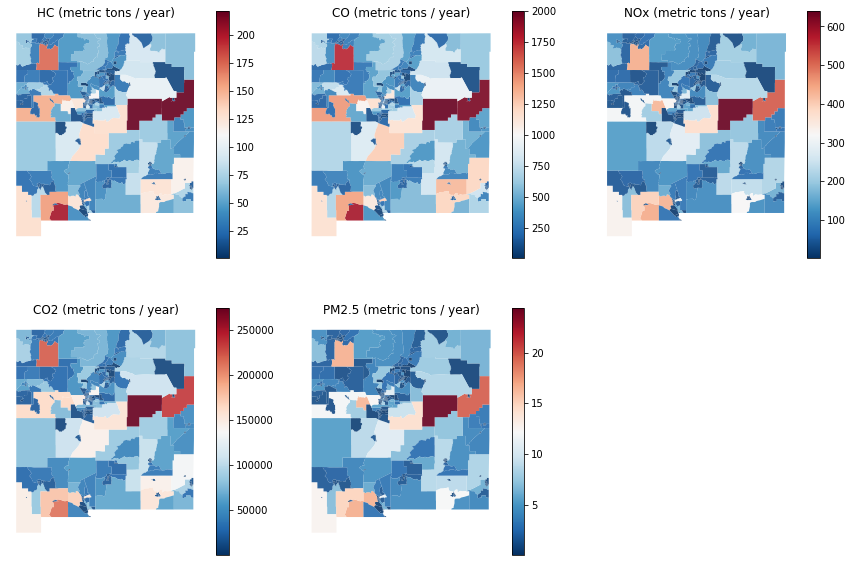

In [32]:
f,ax_array = plt.subplots(2,3, figsize=(15,10))
for i, pol in enumerate(pollutants):
    pol
    ax = np.ravel(ax_array)[i]
    combo.plot(pol, cmap='RdBu_r', ax = ax, alpha=.9, legend=True)
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(pol + ' (metric tons / year)')
ax_array[-1,-1].set_axis_off()
plt.savefig('./figures/new mexico/NM_pollutantmaps.png',dpi=400)

ax.set_facecolor('k')

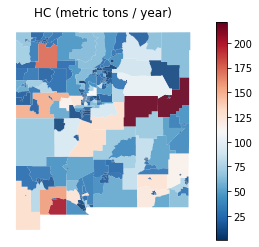

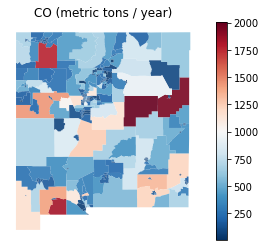

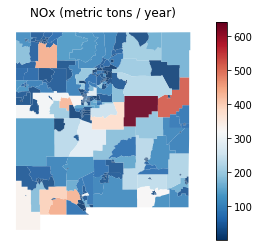

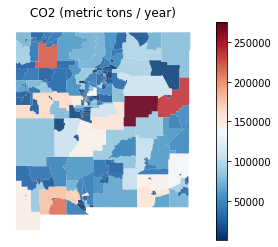

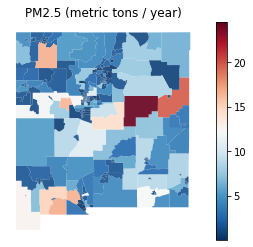

In [33]:
for i, pol in enumerate(pollutants):
#     ax = np.ravel(ax_array)[i]
    combo.plot(pol, cmap='RdBu_r', alpha=.9, legend=True)
    ax = plt.gca()
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(pol + ' (metric tons / year)')
    plt.savefig('./figures/new mexico/{} annual_tons_NM_map.png'.format(pol),dpi=400)

ax.set_facecolor('k')

In [45]:
metromicrorural = pd.read_csv('Demographic/NVNMCOtract_MetroMicroRural.csv')
metromicrorural.drop(metromicrorural.columns.difference(['GEOID','NAME_1', 'MEMI']), 1, inplace=True)
metromicrorural.set_index('GEOID', inplace=True)
metromicrorural_alb = metromicrorural[metromicrorural['NAME_1'].str.contains('Albuquerque') == True]
metromicrorural_alb

,NAME_1,MEMI
GEOID,,
35057963600,"Albuquerque, NM",1
35057963700,"Albuquerque, NM",1
35001004402,"Albuquerque, NM",1
35001004501,"Albuquerque, NM",1
35001004712,"Albuquerque, NM",1
...,...,...
35043010712,"Albuquerque, NM",1
35043010715,"Albuquerque, NM",1
35043940300,"Albuquerque, NM",1


In [46]:
combo_alb = combo.join(metromicrorural_alb).dropna()
combo_alb_persqmi = combo_alb.join(tract_area).dropna()
combo_alb_persqmi[pollutants] = combo_alb_persqmi[pollutants].div(combo_alb_persqmi['tract_area'].values,axis=0)
combo_alb_persqmi.drop(columns =['tract_area'])

,geometry,NAME,state,county,tract,HC,CO,NOx,CO2,PM2.5,NAME_1,MEMI
GEOID,,,,,,,,,,,,
35061970200,"POLYGON ((-11880189.830 4145854.740, -11880188...","Census Tract 9702, Valencia County, New Mexico",35,061,970200,2.735355,25.431775,4.344094,2534.743366,0.164369,"Albuquerque, NM",1.0
35061970102,"POLYGON ((-11879809.890 4137367.070, -11879719...","Census Tract 9701.02, Valencia County, New Mexico",35,061,970102,2.557594,25.665106,3.686675,2541.382457,0.140777,"Albuquerque, NM",1.0
35001004748,"POLYGON ((-11883617.130 4191490.650, -11883581...","Census Tract 47.48, Bernalillo County, New Mexico",35,001,004748,2.880875,31.417648,3.688107,3037.195874,0.138959,"Albuquerque, NM",1.0
35001004733,"POLYGON ((-11882304.010 4171451.910, -11882142...","Census Tract 47.33, Bernalillo County, New Mexico",35,001,004733,9.210532,98.486891,11.911641,9583.601685,0.454670,"Albuquerque, NM",1.0
35001004742,"POLYGON ((-11881245.920 4179189.910, -11881233...","Census Tract 47.42, Bernalillo County, New Mexico",35,001,004742,6.242751,63.695561,8.660687,6262.548261,0.331321,"Albuquerque, NM",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35001000109,"POLYGON ((-11859241.060 4181319.550, -11859235...","Census Tract 1.09, Bernalillo County, New Mexico",35,001,000109,13.219237,137.332633,19.424022,13892.127720,0.745091,"Albuquerque, NM",1.0
35001000111,"POLYGON ((-11857272.820 4180348.860, -11857272...","Census Tract 1.11, Bernalillo County, New Mexico",35,001,000111,11.262843,118.785235,15.768839,11835.148449,0.603157,"Albuquerque, NM",1.0
35001000713,"POLYGON ((-11857235.080 4171487.400, -11857232...","Census Tract 7.13, Bernalillo County, New Mexico",35,001,000713,9.121832,97.464089,12.165259,9581.803111,0.464692,"Albuquerque, NM",1.0


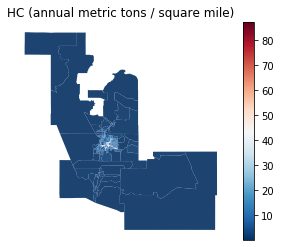

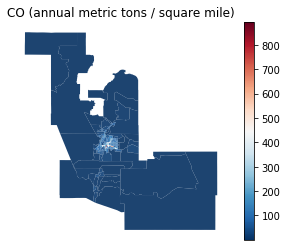

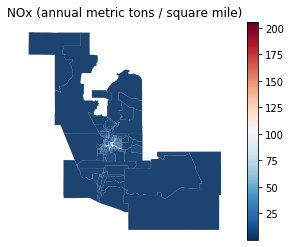

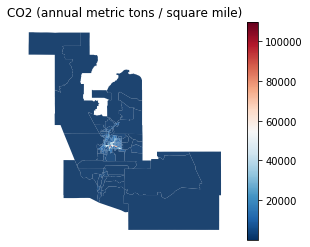

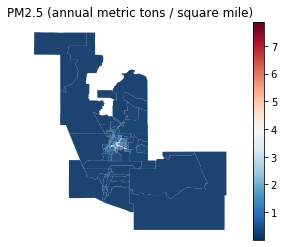

In [50]:
for i, pol in enumerate(pollutants):
#     ax = np.ravel(ax_array)[i]
    combo_alb_persqmi.plot(pol, cmap='RdBu_r', alpha=.9, legend=True)
    ax = plt.gca()
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(pol + ' (annual metric tons / square mile)')
    plt.savefig('./figures/new mexico/{}_alb_annualtons_persqmi_map.png'.format(pol),dpi=800)

ax.set_facecolor('k')